In [ ]:
from __future__ import division
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import Laguerre_Gaussian as LG
import phaseScreenGeneration as PS
from mpl_toolkits import mplot3d
from matplotlib import gridspec
from matplotlib import axes
from matplotlib import rcParams
import CNN_Util as CU
import tensorflow as tf
from tensorflow import keras
import os
import pandas
import h5py
import json
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Constants Used
N = 256
L = 2
ql = 6
zi = 0
zf = 100000
wvl = 500e-9
wr = 0.13
wvn = 1/wvl
ns = 100
dz = zf/ns
modA = 0.3
angleA = 2*np.pi*np.random.rand()
cn2 = 1e-14
L0 = 50
kl = 3.3/0.010
dx = L/N

##Phasescreens

In [ ]:
Uplus0 = LG.UGen(wr, wvl, zf, N, L, ql)
Uminus0 = LG.UGen(wr, wvl, zf, N, L, -ql)

In [ ]:
#f, df = PS.freq(N, L)
phaseScreen1 = PS.phaseStackGenAuto(N, ns, L, modA, angleA, dz, 5e-16, L0, kl, wvn, dx) / dx
phaseScreen2 = PS.phaseStackGenAuto(N, ns, L, modA, angleA, dz, 5e-15, L0, kl, wvn, dx) /dx
phaseScreen3 = PS.phaseStackGenAuto(N, ns, L, modA, angleA, dz, 2.5e-14, L0, kl, wvn, dx) /dx

In [ ]:
Uplus1 = PS.propTurbulenceMulti(dz, Uplus0, N, L, np.real(phaseScreen1), wvn, zf, zi)
Uminus1 = PS.propTurbulenceMulti(dz, Uminus0, N, L, np.real(phaseScreen1), wvn, zf, zi)
Uplus2 = PS.propTurbulenceMulti(dz, Uplus0, N, L, np.real(phaseScreen2), wvn, zf, zi)
Uminus2 = PS.propTurbulenceMulti(dz, Uminus0, N, L, np.real(phaseScreen2), wvn, zf, zi)
Uplus3 = PS.propTurbulenceMulti(dz, Uplus0, N, L, np.real(phaseScreen3), wvn, zf, zi)
Uminus3 = PS.propTurbulenceMulti(dz, Uminus0, N, L, np.real(phaseScreen3), wvn, zf, zi)

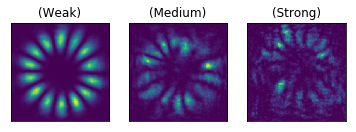

In [ ]:
fig = plt.figure()

q = np.load("Data/weakTurb7Batch0.npy")

ax1 = plt.subplot(131)
ax1.title.set_text('(Weak)')
ax1 = plt.imshow( q[:,:,12], cmap = cm.viridis)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

r = np.load("Data/mediumTurb7Batch0.npy")

ax2 = plt.subplot(132)
ax2.title.set_text('(Medium)')
ax2 = plt.imshow( r[:,:,13], cmap = cm.viridis)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

s = np.load("Data/strongTurb7Batch0.npy")

ax3 = plt.subplot(133)
ax3.title.set_text('(Strong)')
ax3 = plt.imshow( s[:,:,1], cmap = cm.viridis)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

fig.savefig("fig5.png", bbox_inches='tight', dpi=600)

In [ ]:

x = np.linspace(int(-L/2), int(L/2), N)
y = np.linspace(int(-L/2), int(L/2), N)
X, Y = np.meshgrid(x, y)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


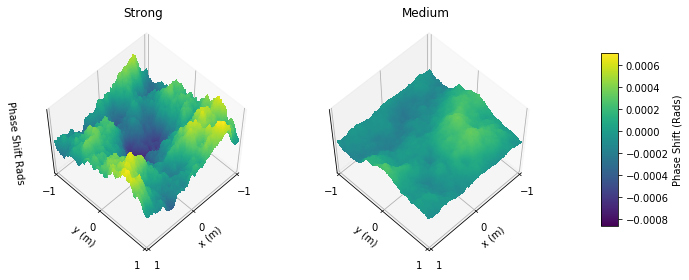

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.title.set_text('Strong')
var1 = ax1.plot_surface(X, Y, phaseScreen1.real, rstride=1, cstride=1, 
                  cmap='viridis', edgecolor='none', antialiased=False, vmax = np.max(phaseScreen1.real),
                        vmin = np.min(phaseScreen1.real))
ax1.set_xticks([-1,0,1])
ax1.set_yticks([-1,0,1])
ax1.set_zticks([])
ax1.set_zlabel('Phase Shift Rads')
ax1.set_xlabel('x (m)')
ax1.set_ylabel('y (m)')
ax1.set_xbound(-1,1)
ax1.set_ybound(-1,1)
ax1.view_init(60, 45)
ax1.dist = 11

ax2 = fig.add_subplot(122, projection='3d')
ax2.title.set_text('Medium')
var2 = ax2.plot_surface(X, Y, phaseScreen2.real, rstride=1, cstride=1, 
                  cmap='viridis', edgecolor='none', antialiased=False, vmax = np.max(phaseScreen1.real),
                        vmin = np.min(phaseScreen1.real))
ax2.set_xticks([-1,0,1])
ax2.set_yticks([-1,0,1])
ax2.set_zticks([])
ax2.set_zbound(ax1.get_zbound())
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_xbound(-1,1)
ax2.set_ybound(-1,1)
ax2.view_init(60, 45)
ax2.dist = 11)

fig.subplots_adjust(right=0.65, wspace = -0.2)
cbar_ax = fig.add_axes([1.05, 0.2, 0.03, 0.6])
fig.colorbar(var1, cax=cbar_ax, label = 'Phase Shift (Rads)',)

fig.tight_layout()
plt.savefig("phaseScreen2Comp.png", bbox_inches='tight', dpi=600)

In [ ]:
plt.figure()
ax1 = plt.subplot(111)
ax1 = plt.imshow( phaseScreen1.real, cmap = cm.viridis)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

In [ ]:
Ufs = np.load("uf16.npy")
Ifs = np.zeros((512,512,17))
Ifs[:,:,0] = LG.waveMerge(Ufs[:,:,0],Ufs[:,:,0])
for i in range(16):
    Ifs[:,:,(i+1)] = LG.waveMerge(Ufs[:,:,(2*i+2)], Ufs[:,:,(2*i+1)])
LG.CMgraph(Ifs[:,:,2])

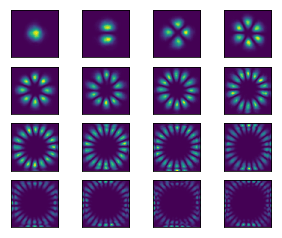

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))
for i in range(16):
    ax1 = plt.subplot(4,4,i+1)
    x = np.load("Data/weakTurb" + str(i) + "Batch3.npy")
    ax1 = plt.imshow( x[:,:,13], cmap = cm.viridis)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
fig.subplots_adjust(right=0.65, wspace = -0.2)
plt.savefig("16example.png", bbox_inches='tight', dpi=600)

In [ ]:
PropError = np.load("propagationError.npy")
print(PropError.shape)

(12, 3)


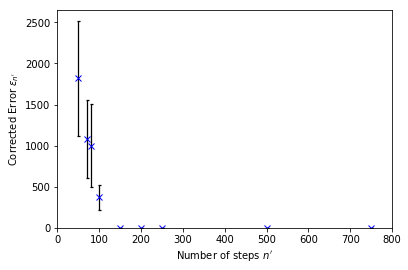

In [ ]:
plt.figure()
plt.errorbar(PropError[:10,0], PropError[:10,1], PropError[:10,2],
            ecolor = 'black', elinewidth = 1.25, capsize = 1.5,
             capthick = 1.25, linewidth = 0, fmt = 'bx')
plt.ylabel("Corrected Error $\epsilon_{n'}$")
plt.xlabel("Number of steps $n'$")
plt.ylim(0)
plt.xlim(0,800)
plt.savefig("propTests.png", bbox_inches='tight', dpi=600)

# Training Curves and Confusion Matrices

In [ ]:
model = keras.models.load_model('CNN_D&G/3x3extraStrong16ModeSNNModel.h5')

with open("CNN_D&G/3x3extraStrong16ModeSNNHistory.json", 'r') as f:
    history0 = json.load(f)


modesUsed = 16
numTrainBatchPerMode = 4
batchSize = 50
numValBatchPerMode = 1
numBatchPerMode = 5
ML_BATCH_SIZE = 50

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [ ]:
acc0 = history0['acc']
val_acc0 = history0['val_acc']
print("Training acc values = " + str(acc0.values()))
print("Validation acc values = " + str(val_acc0.values()))

Training acc values = dict_values([0.4448437495, 0.5294531249, 0.5756250031, 0.6122656277, 0.6525000035, 0.6941406268, 0.7303906246, 0.7670312487, 0.7971093715, 0.8333593693, 0.8598437458, 0.8902343716, 0.9128906219, 0.9321093727, 0.9453124972])
Validation acc values = dict_values([0.4831249998, 0.481562499, 0.507500002, 0.5171874978, 0.530624997, 0.5162499992, 0.5393750001, 0.533125001, 0.5300000017, 0.5318749955, 0.5303125005, 0.5350000007, 0.52625, 0.5256250004, 0.5234375007])


In [ ]:
validationDataList, validationDataLabel, idsV = CU.list_labelsV(modesUsed, numValBatchPerMode,
                                                                numBatchPerMode, batchSize, "Data/3x3extraStrongTurb")
validation_generator = CU.batch_generatorV(idsV, ML_BATCH_SIZE, numValBatchPerMode,
                                 validationDataList, validationDataLabel, batchSize)

Y_pred = model.predict_generator(validation_generator, (len(idsV) // ML_BATCH_SIZE))
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
#Checking everything is how it should be
print(y_pred.shape)
print(len(idsV))
print(len(validationDataLabel))
print((len(idsV) // ML_BATCH_SIZE)+1)
agumentValidationDataLabel = np.zeros((4*len(validationDataLabel)))
for i in range(len(validationDataLabel)):
    agumentValidationDataLabel[4*i] = validationDataLabel[i]
    agumentValidationDataLabel[4*i+1] = validationDataLabel[i]
    agumentValidationDataLabel[4*i+2] = validationDataLabel[i]
    agumentValidationDataLabel[4*i+3] = validationDataLabel[i]

(6400,)
6400
1600
129


In [ ]:
confusionM = confusion_matrix(agumentValidationDataLabel, y_pred)
print(confusionM.shape)
confusionM = confusionM/200
fig, ax = plt.subplots(figsize = (16,16))
ax.matshow(confusionM, cmap = 'Blues')
        
for (i, j), z in np.ndenumerate(confusionM):
    if(0 < z <0.5):
        ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', color = 'black')
    else:
        ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', color = 'white')
ax.set_ylabel("True Mode")
ax.set_xlabel("Predicted Mode")
ax.set_axisbelow(True)
ax.tick_params(bottom = True, top = False, labelbottom = True, labeltop = False)
ax.grid(True, which = 'minor')
ax.set_xticks(np.arange(modesUsed))
ax.set_yticks(np.arange(modesUsed))

dict_values([0.3138281264, 0.3892578129, 0.4305859367, 0.466132812, 0.4964843733, 0.5337499999, 0.5700781267, 0.6051562543, 0.6391406297, 0.672187504, 0.705312504, 0.7373828131, 0.7655859356, 0.7883984337, 0.8144140574])


<Figure size 1080x432 with 0 Axes>

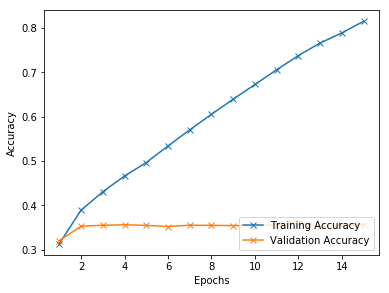

In [ ]:
epochs_range = range(1, 16)

acc0 = history0['acc']
val_acc0 = history0['val_acc']
acv0 = acc0.values()
print(acv0)

plt.figure(figsize=(15, 6))
f, (ax1) = plt.subplots(1,1, figsize=(6, 4.5))
plt.subplot(1,1,1)
plt.plot(epochs_range, acc0.values(), 'x-',label='Training Accuracy',)
plt.plot(epochs_range, val_acc0.values(), 'x-',label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

plt.savefig("Graphs/trCurv32xsSNN.png", bbox_inches='tight', dpi=600)

dict_values([0.3138281264, 0.3892578129, 0.4305859367, 0.466132812, 0.4964843733, 0.5337499999, 0.5700781267, 0.6051562543, 0.6391406297, 0.672187504, 0.705312504, 0.7373828131, 0.7655859356, 0.7883984337, 0.8144140574])


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 1080x432 with 0 Axes>

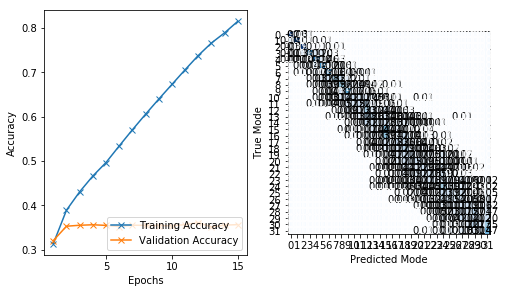

In [ ]:
epochs_range = range(1, 16)

acc0 = history0['acc']
val_acc0 = history0['val_acc']
acv0 = acc0.values()
print(acv0)

plt.figure(figsize=(15, 6))
f, (ax1, ax) = plt.subplots(1,2, figsize=(8, 4.5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc0.values(), 'x-',label='Training Accuracy',)
plt.plot(epochs_range, val_acc0.values(), 'x-',label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

plt.subplot(1,2,1)
ax.matshow(confusionM, cmap = 'Blues')
        
for (i, j), z in np.ndenumerate(confusionM):
    if(0 < z <0.5):
        ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'black')
    else:
        ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'white')
ax.set_ylabel("True Mode")
ax.set_xlabel("Predicted Mode")
ax.set_axisbelow(True)
ax.tick_params(bottom = True, top = False, labelbottom = True, labeltop = False)
ax.grid(True, which = 'minor')
ax.set_xticks(np.arange(modesUsed))
ax.set_yticks(np.arange(modesUsed))
plt.savefig("Graphs/both32xsSNN.png", bbox_inches='tight', dpi=600)

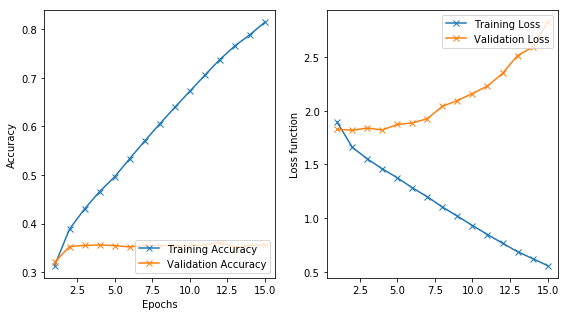

In [ ]:
epochs_range = range(1,16)
acc = history0['acc']
val_acc = history0['val_acc']

loss = history0['loss']
val_loss = history0['val_loss']

plt.figure(figsize=(8, 4.5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc.values(), 'x-', label='Training Accuracy')
plt.plot(epochs_range, val_acc.values(), 'x-', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss.values(), 'x-', label='Training Loss')
plt.plot(epochs_range, val_loss.values(), 'x-', label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel("Loss function")
plt.tight_layout()

plt.savefig("Graphs/loss32xsSNN.png", bbox_inches='tight', dpi=600)

In [ ]:
model = keras.models.load_model('CNN_D&G/3x3strong32ModeSNNModel.h5')

with open("CNN_D&G/3x3strong32ModeSNNHistory.json", 'r') as f:
    history0 = json.load(f)

model1 = keras.models.load_model('CNN_D&G/3x3extraStrong4ModeSNNModel.h5')

with open("CNN_D&G/3x3extraStrong4ModeSNNHistory.json", 'r') as f:
    history1 = json.load(f)

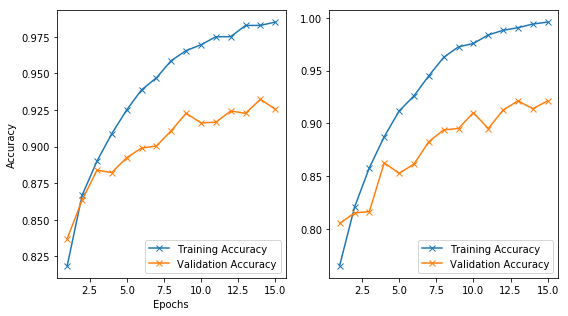

In [ ]:
epochs_range0 = range(1,16)
epochs_range = range(1,16)

acc = history0['acc']
val_acc = history0['val_acc']

loss = history0['loss']
val_loss = history0['val_loss']

acc1 = history1['acc']
val_acc1 = history1['val_acc']

plt.figure(figsize=(8, 4.5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc.values(), 'x-', label='Training Accuracy')
plt.plot(epochs_range, val_acc.values(), 'x-', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range0, acc1.values(), 'x-', label='Training Accuracy')
plt.plot(epochs_range0, val_acc1.values(), 'x-', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()

plt.savefig("Graphs/s32compxs4SNN.png", bbox_inches='tight', dpi=600)

# Rotations

Data was not looped through so graphs could be compared

In [ ]:
#Data Loading

data_list = ["AugmentationData/rotation4extraStrongCNN1.npy", "AugmentationData/rotation4extraStrongCNN2.npy",
            "AugmentationData/rotation4extraStrongSNN.npy","AugmentationData/rotation8extraStrongCNN1.npy",
            "AugmentationData/rotation8extraStrongCNN2.npy","AugmentationData/rotation8extraStrongSNN.npy",
            "AugmentationData/rotation16extraStrongCNN1.npy","AugmentationData/rotation16extraStrongCNN2.npy",
            "AugmentationData/rotation16extraStrongSNN.npy","AugmentationData/rotation32extraStrongCNN1.npy",
            "AugmentationData/rotation32extraStrongCNN2.npy","AugmentationData/rotation32extraStrongSNN.npy"]

def angleRed(func):
    return ((func.min())/func.max())

In [ ]:
angles = np.load(data_list[0])[:,0]

dat1 = np.load(data_list[0])[:,1]
dat2 = np.load(data_list[1])[:,1]
dat3 = np.load(data_list[2])[:,1]

60
0.5065963007753236
53
0.5322997393883191
36
0.46540026987802474


<Figure size 1080x432 with 0 Axes>

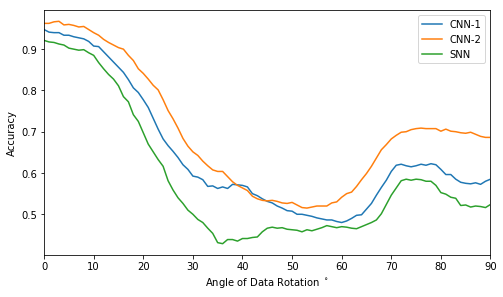

In [ ]:
epochs_range = range(1, 16)

plt.figure(figsize=(15, 6))
f, (ax1) = plt.subplots(1,1, figsize=(8, 4.5))
plt.subplot(1,1,1)
plt.plot(angles, dat1, '-',label='CNN-1',)
plt.plot(angles, dat2, '-',label='CNN-2')
plt.plot(angles, dat3, '-',label='SNN')
plt.xlabel("Angle of Data Rotation $^\circ$")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.xlim(0,90)

plt.savefig("Graphs/rotationCurvexs4.png", bbox_inches='tight', dpi=600)

print(np.argmin(dat1))
print(angleRed(dat1))
print(np.argmin(dat2))
print(angleRed(dat2))
print(np.argmin(dat3))
print(angleRed(dat3))

In [ ]:
angles = np.load(data_list[0])[:,0]

dat4 = np.load(data_list[3])[:,1]
dat5 = np.load(data_list[4])[:,1]
dat6 = np.load(data_list[5])[:,1]

43
0.6212003150888292
54
0.5258181855406643
64
0.467860052619359


<Figure size 1080x432 with 0 Axes>

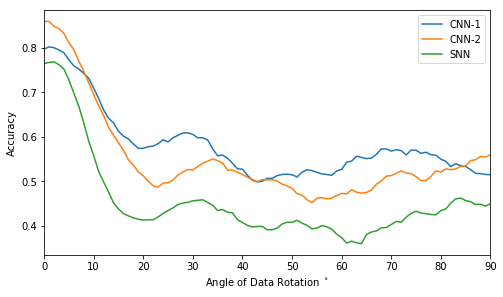

In [ ]:

plt.figure(figsize=(15, 6))
f, (ax1) = plt.subplots(1,1, figsize=(8, 4.5))
plt.subplot(1,1,1)
plt.plot(angles, dat4, '-',label='CNN-1',)
plt.plot(angles, dat5, '-',label='CNN-2')
plt.plot(angles, dat6, '-',label='SNN')
plt.xlabel("Angle of Data Rotation $^\circ$")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.xlim(0,90)

plt.savefig("Graphs/rotationCurvexs8.png", bbox_inches='tight', dpi=600)

print(np.argmin(dat4))
print( angleRed(dat4))
print(np.argmin(dat5))
print( angleRed(dat5))
print(np.argmin(dat6))
print( angleRed(dat6))

In [ ]:
angles = np.load(data_list[0])[:,0]

dat7 = np.load(data_list[6])[:,1]
dat8 = np.load(data_list[7])[:,1]
dat9 = np.load(data_list[8])[:,1]

47
0.7256205661895405
40
0.7606607831195358
56
0.5522388035137316


<Figure size 1080x432 with 0 Axes>

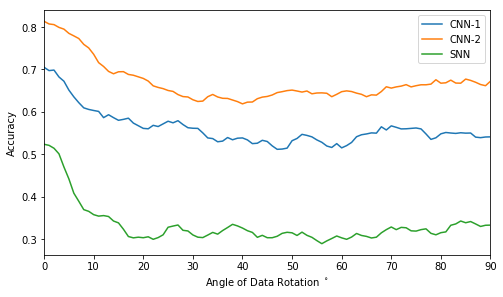

In [ ]:


plt.figure(figsize=(15, 6))
f, (ax1) = plt.subplots(1,1, figsize=(8, 4.5))
plt.subplot(1,1,1)
plt.plot(angles, dat7, '-',label='CNN-1',)
plt.plot(angles, dat8, '-',label='CNN-2')
plt.plot(angles, dat9, '-',label='SNN')
plt.xlabel("Angle of Data Rotation $^\circ$")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.xlim(0,90)

plt.savefig("Graphs/rotationCurvexs16.png", bbox_inches='tight', dpi=600)

print(np.argmin(dat7))
print( angleRed(dat7))
print(np.argmin(dat8))
print( angleRed(dat8))
print(np.argmin(dat9))
print( angleRed(dat9))

In [ ]:
angles = np.load(data_list[0])[:,0]

dat10 = np.load(data_list[9])[:,1]
dat11 = np.load(data_list[10])[:,1]
dat12 = np.load(data_list[11])[:,1]

60
0.832656164986189
62
0.8768428227744055
60
0.5957074008262836


<Figure size 1080x432 with 0 Axes>

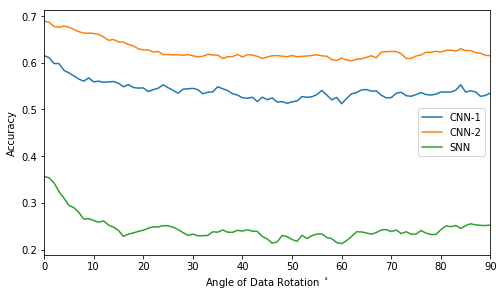

In [ ]:


plt.figure(figsize=(15, 6))
f, (ax1) = plt.subplots(1,1, figsize=(8, 4.5))
plt.subplot(1,1,1)
plt.plot(angles, dat10, '-',label='CNN-1',)
plt.plot(angles, dat11, '-',label='CNN-2')
plt.plot(angles, dat12, '-',label='SNN')
plt.xlabel("Angle of Data Rotation $^\circ$")
plt.ylabel("Accuracy")
plt.legend(loc='center right')
plt.xlim(0,90)

plt.savefig("Graphs/rotationCurvexs32.png", bbox_inches='tight', dpi=600)

print(np.argmin(dat10))
print( angleRed(dat10))
print(np.argmin(dat11))
print( angleRed(dat11))
print(np.argmin(dat12))
print( angleRed(dat12))